# Análisis Bases de datos B2C

In [2]:
import sys
!pip install pandas
import pandas as pd
import numpy as np
import nltk


import re
import nltk
from joblib import dump, load
import matplotlib.pyplot as plt
pd.options.display.max_colwidth=200
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler  # Asegúrate de importar StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score




import scipy.stats as stats
import seaborn as sns; sns.set()  # for plot styling

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D # for 3D plots
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse, r2_score, mean_absolute_error as mae


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree


from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold

# Metricas
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# q-q plots
import scipy.stats as stats


[notice] A new release of pip is available: 24.1.2 -> 25.0.1
[notice] To update, run: C:\Users\volpi\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Carga de datos 

In [3]:
pd1 = pd.read_csv('base_1_transaccional.txt', sep = '\t')
pd2 = pd.read_csv('base_2_cotizaciones.txt', sep = '\t')

df_trans_B2C = pd1.copy()
df_cot_B2C = pd2.copy()

Se cargan los datos y se generan copias para no modificar los datos originales

A continuación se realizaron los respectivos análisis y entendimiento de datos de ambas base B2C, por separado

# Transaccional B2C

## 1. Entendimiento y Perfilamiento de datos

In [3]:
df_trans_B2C.shape

(2099836, 18)

In [4]:
df_trans_B2C.sample(10)

,fecha,pedido,id,edad,municipio,zona,asesor,punto de venta,cluster,categoria_macro,categoria,subcategoria,producto,color,cantidad,precio,valor,alineación con portafolio estratégico
14922,1971-04-25,3452,3045,41,GUATICA,RISARALDA,asesor_100,punto_venta_9,cluster_tienda_3,categoria_macro_1,categoria_1,subcategoria_15,producto_1518,No encontrado,2.00,2.24,4.48,0.383616
325608,1972-08-04,144387,93919,30,APIA,RISARALDA,asesor_56,punto_venta_1,cluster_tienda_1,categoria_macro_2,categoria_5,subcategoria_5,producto_39,GRIS,3.78,2.37,8.95,0.566784
730014,1973-01-07,326717,193774,56,CURITI,SANTANDER,asesor_69,punto_venta_12,cluster_tienda_1,categoria_macro_2,categoria_3,subcategoria_22,producto_49,GRIS,250.00,0.08,19.80,1.876608
1279208,1972-03-09,570838,35483,46,GUATICA,RISARALDA,asesor_118,punto_venta_28,cluster_tienda_2,categoria_macro_2,categoria_7,subcategoria_5,producto_129,BLANCO,3.20,3.05,9.76,0.867456
212647,1971-08-14,94506,56806,53,GUASCA,CUNDINAMARCA,asesor_354,punto_venta_25,cluster_tienda_2,categoria_macro_2,categoria_3,subcategoria_9,producto_19,GRIS,50.00,0.11,5.45,0.566784
1853861,1972-10-25,771276,359650,40,EL TARRA,NORTE SANTANDER,asesor_489,punto_venta_63,cluster_tienda_5,categoria_macro_4,categoria_11,subcategoria_41,producto_238,No encontrado,1.00,4.04,4.04,0.542592
144543,1972-04-07,64154,42560,60,CURITI,SANTANDER,asesor_71,punto_venta_20,cluster_tienda_3,categoria_macro_4,categoria_12,subcategoria_14,producto_3114,No encontrado,1.00,33.13,33.13,2.944512
296815,1972-08-15,131819,87111,31,CURITI,SANTANDER,asesor_363,punto_venta_20,cluster_tienda_3,categoria_macro_2,categoria_3,subcategoria_9,producto_67,GRIS,225.00,0.29,65.40,8.380800
875901,1972-02-07,392446,85507,30,PASTO,NARIÑO,asesor_209,punto_venta_26,cluster_tienda_2,categoria_macro_2,categoria_3,subcategoria_3,producto_156,No encontrado,2.00,0.65,1.30,0.134784
488449,1972-12-05,217390,136454,24,CURITI,SANTANDER,asesor_292,punto_venta_12,cluster_tienda_1,categoria_macro_2,categoria_5,subcategoria_5,producto_3097,BLANCO,7.76,2.49,19.35,1.503360


In [5]:
df_trans_B2C.head()

,fecha,pedido,id,edad,municipio,zona,asesor,punto de venta,cluster,categoria_macro,categoria,subcategoria,producto,color,cantidad,precio,valor,alineación con portafolio estratégico
0,1971-04-30,2,2,52,EL CARMEN DE CHUCURI,SANTANDER,asesor_2,punto_venta_2,cluster_tienda_2,categoria_macro_1,categoria_2,subcategoria_2,producto_2,GRIS,1.00,32.88,32.88,2.920320
1,1971-04-30,3,3,31,VILLANUEVA,LA GUAJIRA,asesor_3,punto_venta_2,cluster_tienda_2,categoria_macro_2,categoria_3,subcategoria_3,producto_3,BEIGE,2.00,0.56,1.13,0.117504
2,1971-04-30,4,4,43,VILLANUEVA,LA GUAJIRA,asesor_4,punto_venta_2,cluster_tienda_2,categoria_macro_3,categoria_4,subcategoria_4,producto_4,No encontrado,1.00,8.38,8.38,1.251072
3,1971-04-30,5,5,31,VILLANUEVA,LA GUAJIRA,asesor_5,punto_venta_3,cluster_tienda_3,categoria_macro_2,categoria_5,subcategoria_5,producto_5,BLANCO,21.14,2.27,47.99,3.729024
4,1971-04-30,6,6,49,ARROYOHONDO,BOLÍVAR,asesor_6,punto_venta_4,cluster_tienda_2,categoria_macro_4,categoria_6,subcategoria_6,producto_6,No encontrado,1.00,9.96,9.96,1.223424


In [6]:
df_trans_B2C.describe()

,pedido,id,edad,cantidad,precio,valor,alineación con portafolio estratégico
count,2.099836e+06,2.099836e+06,2.099836e+06,2.099836e+06,2.099305e+06,2.099836e+06,2.099836e+06
mean,4.670092e+05,1.653520e+05,4.187073e+01,3.805441e+01,9.244210e+00,3.999169e+01,3.945120e+00
std,2.705491e+05,1.214593e+05,9.563071e+00,7.464008e+02,2.953051e+01,1.650740e+02,2.192130e+01
min,2.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.418746e+04
25%,2.317010e+05,5.829400e+04,3.200000e+01,1.000000e+00,6.500000e-01,4.690000e+00,4.734720e-01
50%,4.668240e+05,1.379730e+05,4.300000e+01,3.020000e+00,2.990000e+00,1.332000e+01,1.410048e+00
75%,7.026782e+05,2.617442e+05,4.900000e+01,1.296000e+01,6.270000e+00,3.713000e+01,3.725568e+00
max,9.339360e+05,4.192260e+05,6.700000e+01,4.896890e+05,1.204348e+04,5.687609e+04,4.162227e+03


In [7]:
df_trans_B2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099836 entries, 0 to 2099835
Data columns (total 18 columns):
 #   Column                                 Dtype  
---  ------                                 -----  
 0   fecha                                  object 
 1   pedido                                 int64  
 2   id                                     int64  
 3   edad                                   int64  
 4   municipio                              object 
 5   zona                                   object 
 6   asesor                                 object 
 7   punto de venta                         object 
 8   cluster                                object 
 9   categoria_macro                        object 
 10  categoria                              object 
 11  subcategoria                           object 
 12  producto                               object 
 13  color                                  object 
 14  cantidad                               float64
 15

In [8]:
# Para categorizar las variables en su tipo de dato
categorical_cols = df_trans_B2C.select_dtypes(include=["object"]).columns
numeric_cols = df_trans_B2C.select_dtypes(include=["number"]).columns
datetime_cols = df_trans_B2C.select_dtypes(include=["datetime"]).columns

# Imprimir las variables categóricas
print("Variables categóricas:")
print(", ".join(categorical_cols))

# Imprimir las variables numéricas
print("\nVariables numéricas:")
print(", ".join(numeric_cols))

# Imprimir las variables de fecha
print("\nVariables de fecha:")
print(", ".join(datetime_cols))

Variables categóricas:
fecha, municipio, zona, asesor, punto de venta, cluster, categoria_macro, categoria, subcategoria, producto, color

Variables numéricas:
pedido, id, edad, cantidad, precio, valor, alineación con portafolio estratégico

Variables de fecha:



Se observa que la columna de fecha no corresponde a un tipo fecha sino que es asignada como variable categórica

### 1.1 Atributos Numéricos

In [14]:
var_num = ['pedido', 'id', 'edad', 'cantidad', 'precio', 'valor', 'alineación con portafolio estratégico']

In [10]:
df_trans_B2C[var_num].describe()

,pedido,id,edad,cantidad,precio,valor,alineación con portafolio estratégico
count,2.099836e+06,2.099836e+06,2.099836e+06,2.099836e+06,2.099305e+06,2.099836e+06,2.099836e+06
mean,4.670092e+05,1.653520e+05,4.187073e+01,3.805441e+01,9.244210e+00,3.999169e+01,3.945120e+00
std,2.705491e+05,1.214593e+05,9.563071e+00,7.464008e+02,2.953051e+01,1.650740e+02,2.192130e+01
min,2.000000e+00,1.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,0.000000e+00,-2.418746e+04
25%,2.317010e+05,5.829400e+04,3.200000e+01,1.000000e+00,6.500000e-01,4.690000e+00,4.734720e-01
50%,4.668240e+05,1.379730e+05,4.300000e+01,3.020000e+00,2.990000e+00,1.332000e+01,1.410048e+00
75%,7.026782e+05,2.617442e+05,4.900000e+01,1.296000e+01,6.270000e+00,3.713000e+01,3.725568e+00
max,9.339360e+05,4.192260e+05,6.700000e+01,4.896890e+05,1.204348e+04,5.687609e+04,4.162227e+03


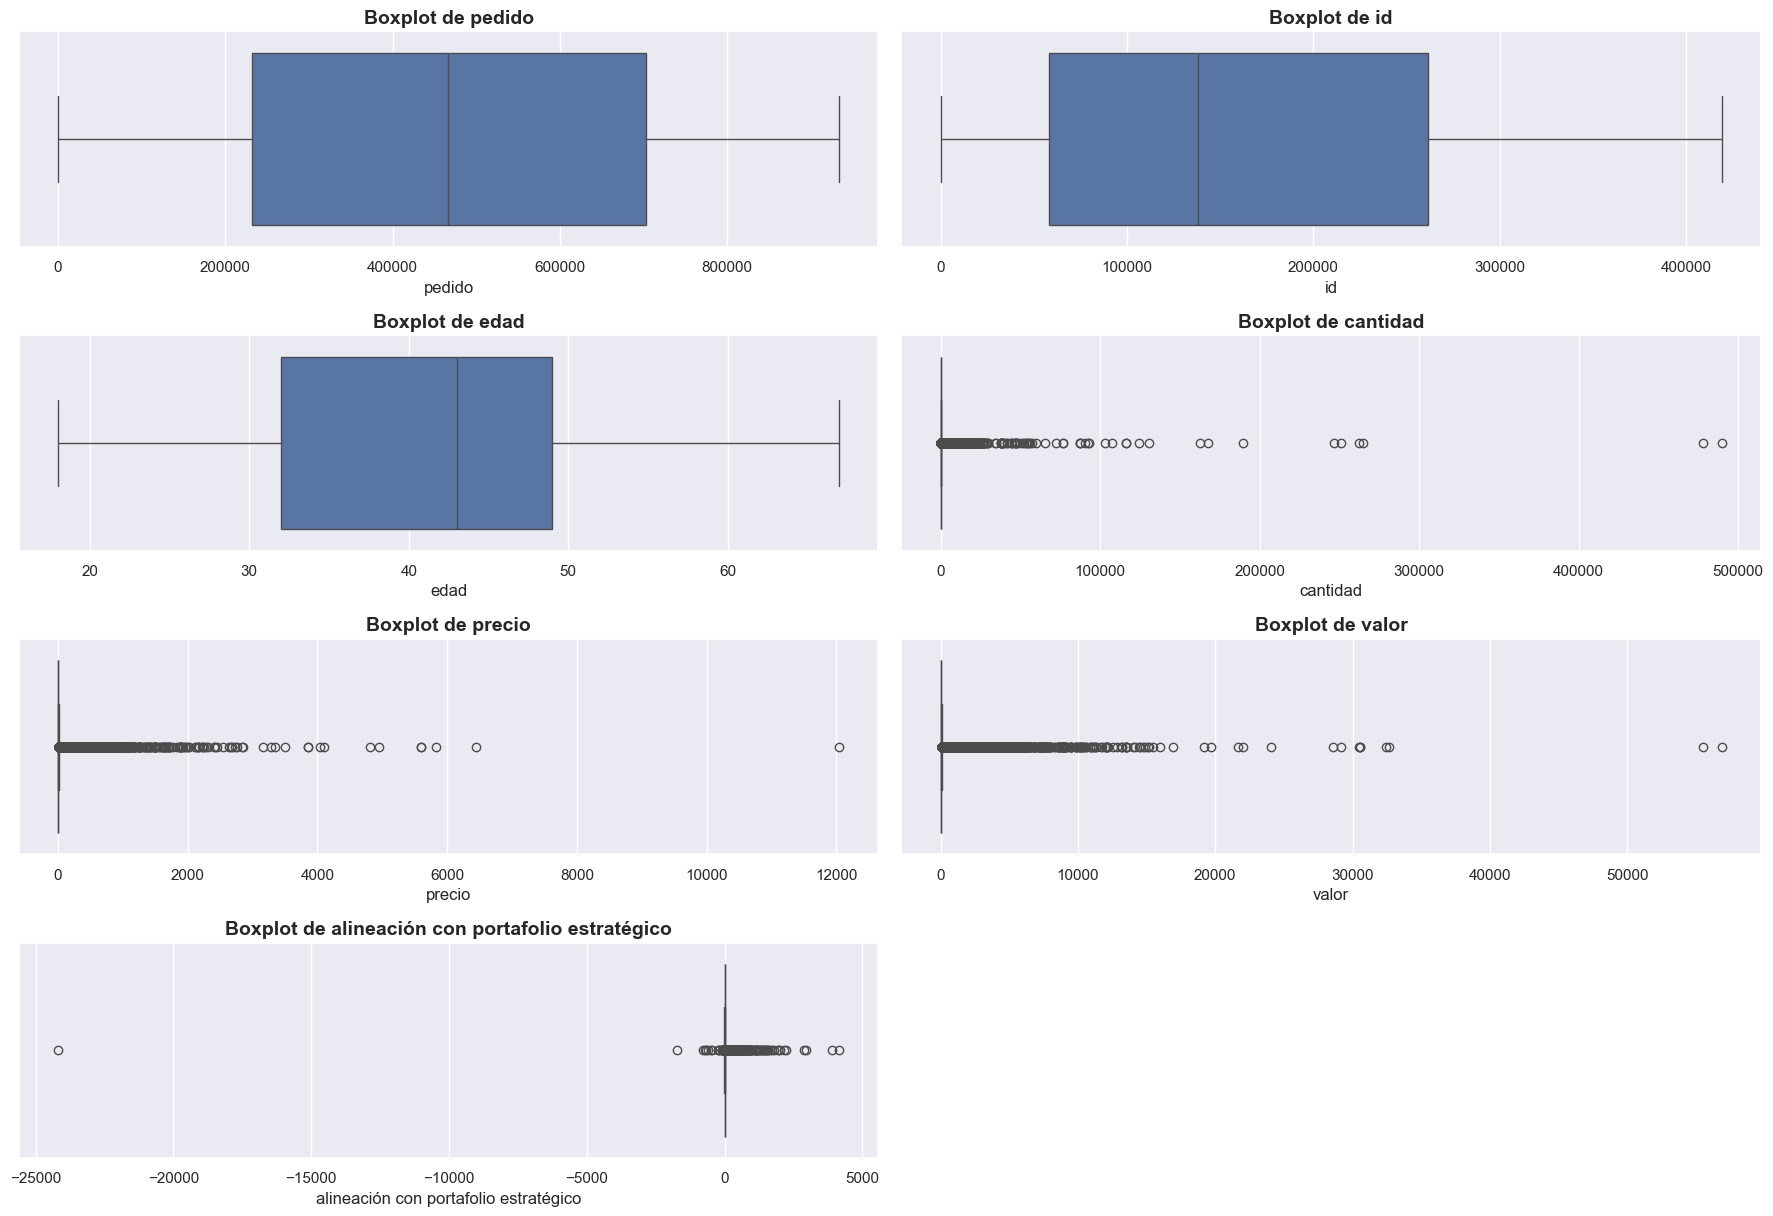

In [11]:
#Diagrama de Cajas y Bigotes por cada variable numerica
plt.figure(figsize=(18, 24))
for i, col in enumerate(var_num, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(x=df_trans_B2C[col])
    plt.title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

#### Análisis de distribución de variables numércas significativas

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="id", kde=True)

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="pedido", kde=True)

<Axes: xlabel='edad', ylabel='Count'>

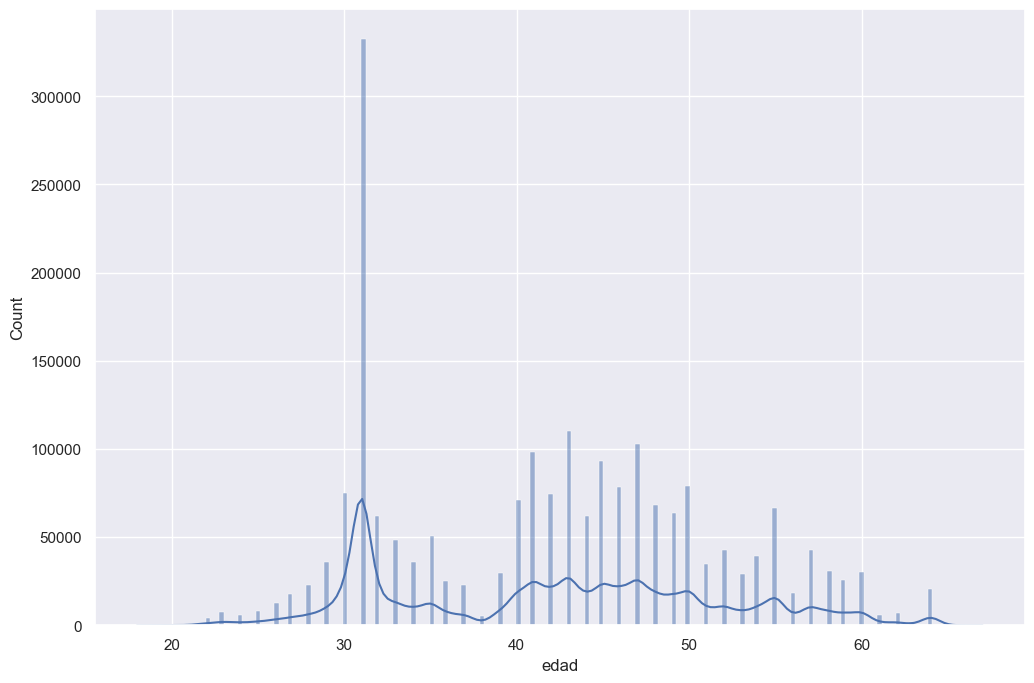

In [13]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="edad", kde=True)

<Axes: xlabel='precio', ylabel='Count'>

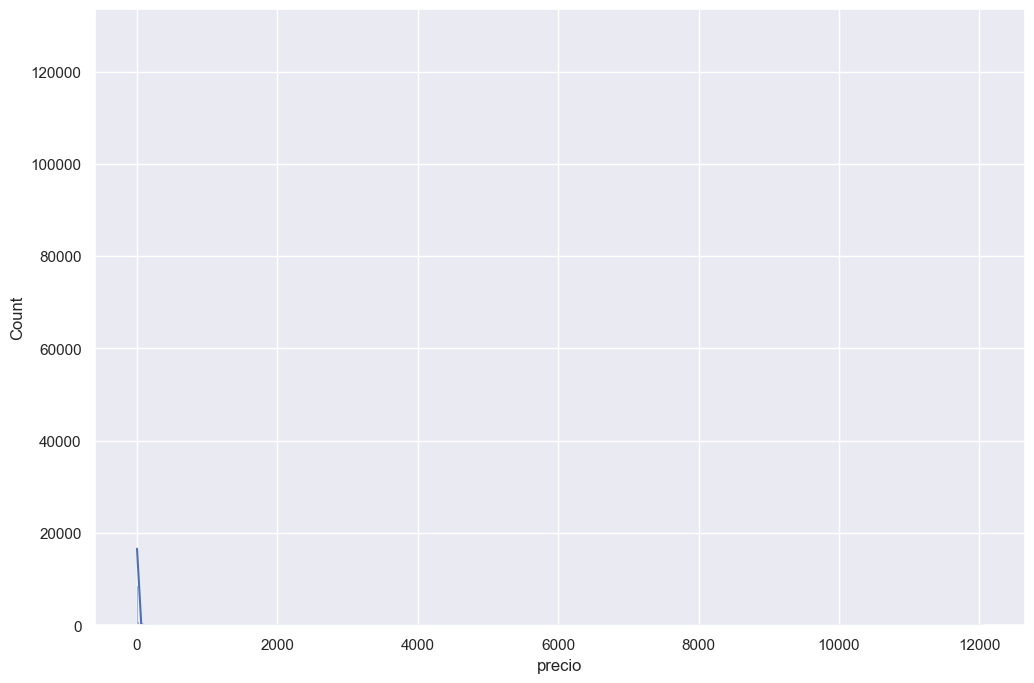

In [4]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="precio", kde=True)

<Axes: xlabel='valor', ylabel='Count'>

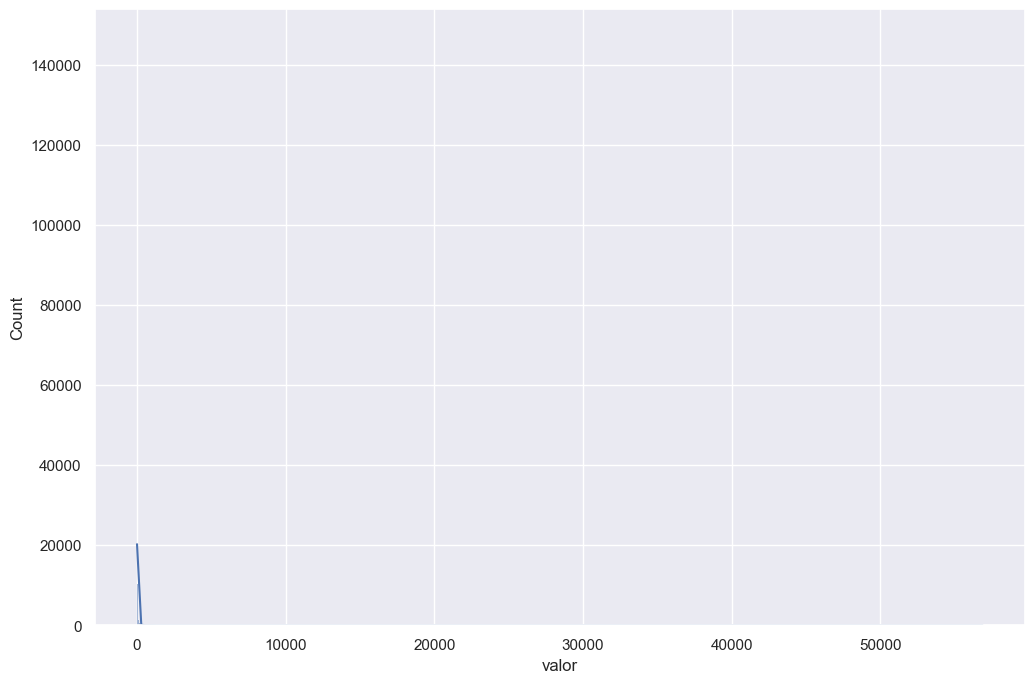

In [5]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="valor", kde=True)

<Axes: xlabel='alineación con portafolio estratégico', ylabel='Count'>

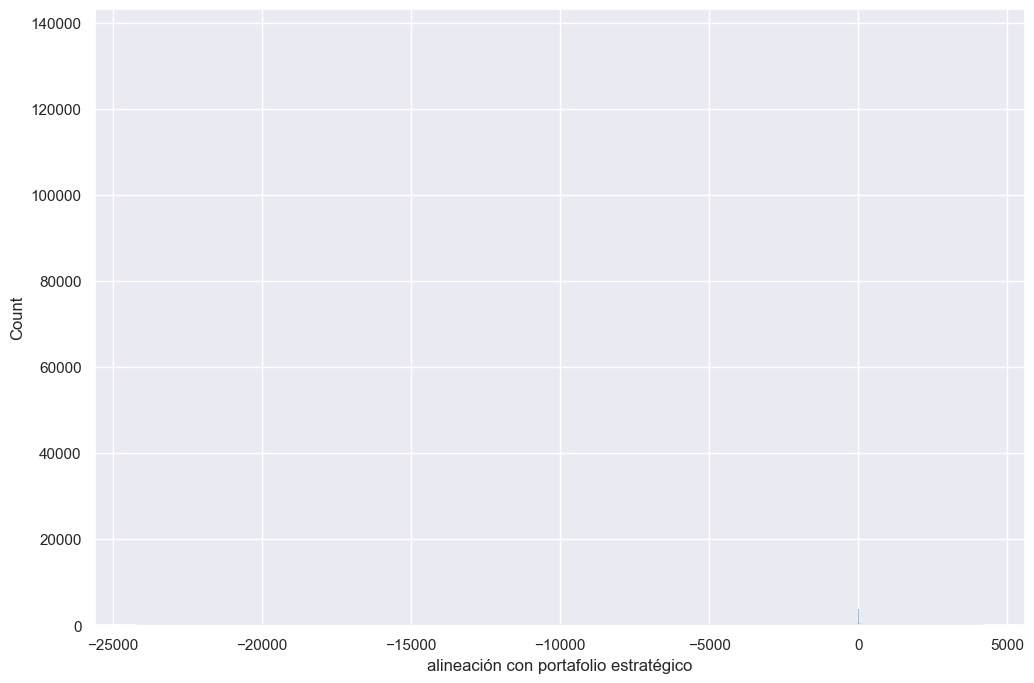

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="alineación con portafolio estratégico", kde=True)

<Axes: xlabel='cantidad', ylabel='Count'>

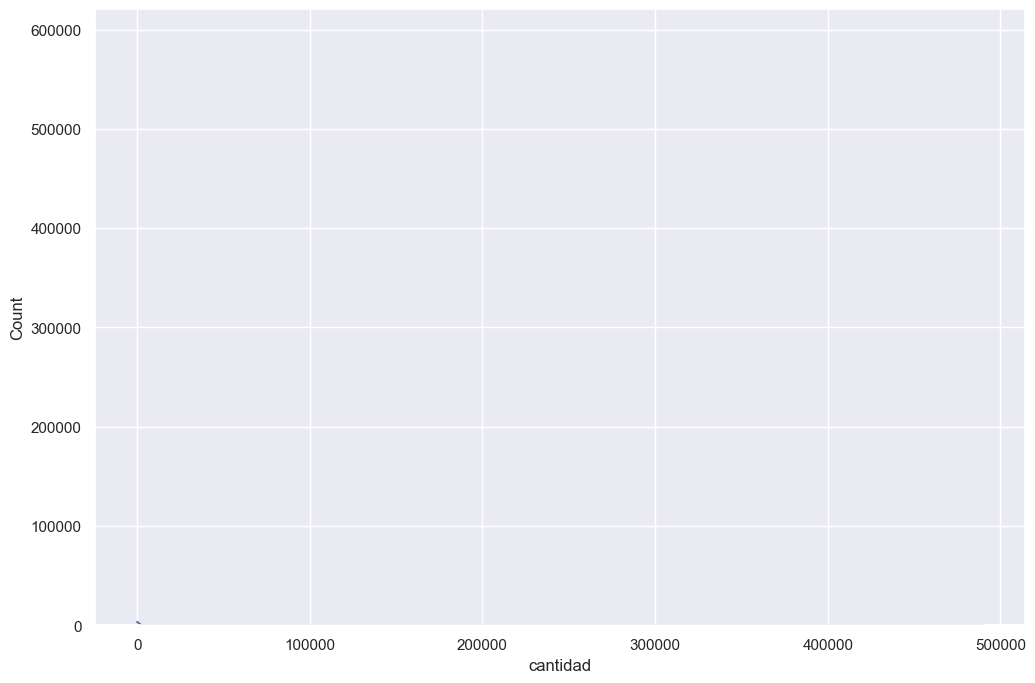

In [8]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_trans_B2C, x="cantidad", kde=True)

Text(0.5, 1.0, 'Correlación entre variables numéricas')

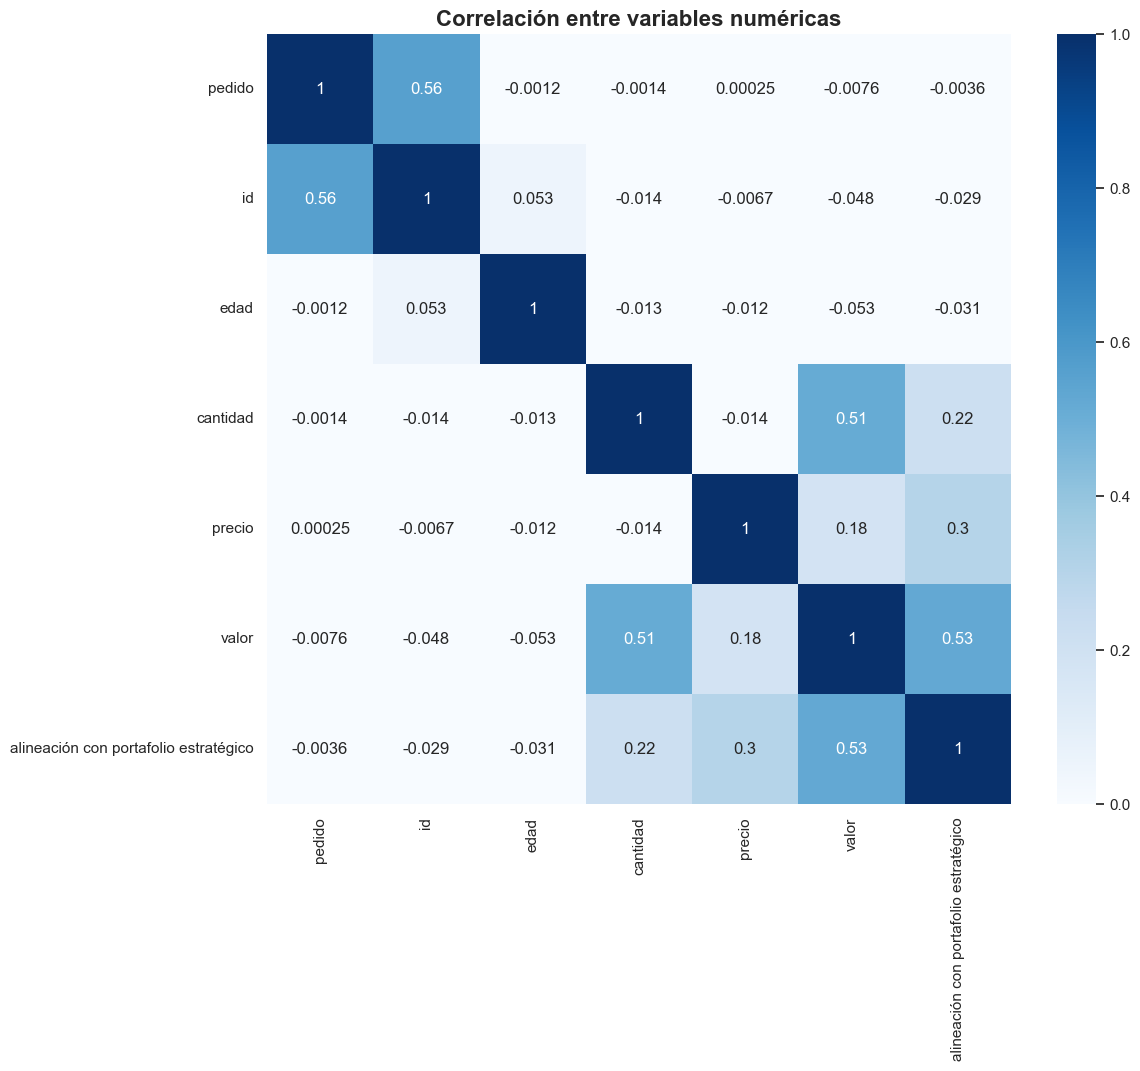

In [16]:
#Análisis de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_trans_B2C[var_num].corr(), cmap="Blues", vmin=0, vmax=1, annot=True)
plt.title("Correlación entre variables numéricas", fontsize=16, fontweight='bold')


### 1.2 Atributos Categóricos

In [17]:
var_cat = ['fecha', 'municipio', 'zona', 'asesor', 'punto de venta', 'cluster', 'categoria_macro', 'categoria', 'subcategoria', 'producto', 'color']

In [18]:
#Visualización Variables Categóricas
for col in var_cat:
    print(f"\nDistribución de {col}:")
    print(df_trans_B2C[col].value_counts())


Distribución de fecha:
fecha
1971-06-28    6572
1971-11-11    4871
1971-11-18    4763
1971-07-08    4649
1971-11-25    4528
              ... 
1972-12-25       7
1971-04-06       7
1971-12-25       5
1973-01-01       3
1971-12-24       2
Name: count, Length: 756, dtype: int64

Distribución de municipio:
municipio
CURITI        576380
NATAGAIMA     344983
VILLANUEVA    142303
GUATICA       130383
GIRARDOTA      76950
               ...  
ARJONA             1
CHINU              1
VILLAMARIA         1
OTANCHE            1
SILVIA             1
Name: count, Length: 808, dtype: int64

Distribución de zona:
zona
SANTANDER          739964
TOLIMA             407991
ANTIOQUIA          224114
LA GUAJIRA         145807
RISARALDA          132904
CUNDINAMARCA       102305
NORTE SANTANDER     59017
BOYACA              45454
HUILA               36290
META                32602
ATLÁNTICO           29473
VALLE               27639
CASANARE            26112
NARIÑO              19021
BOLÍVAR             17

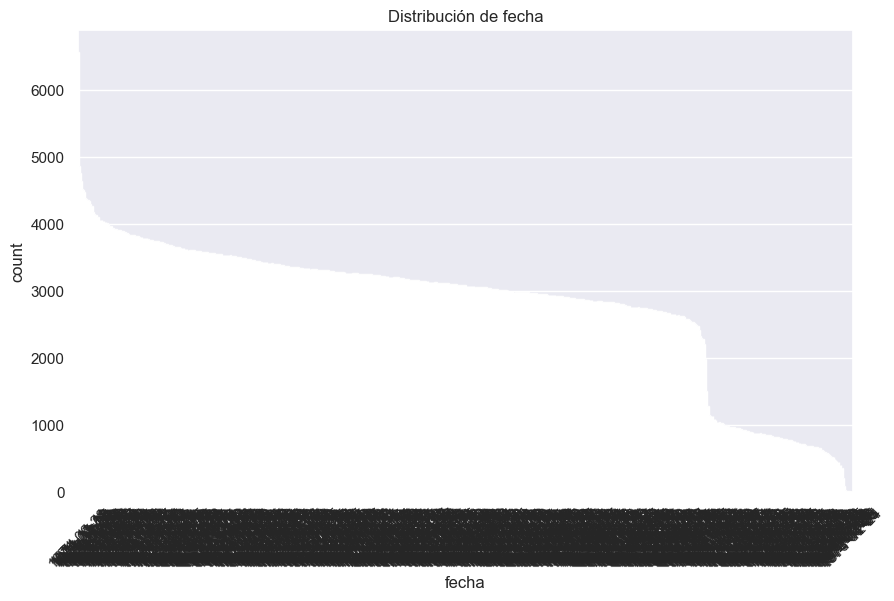

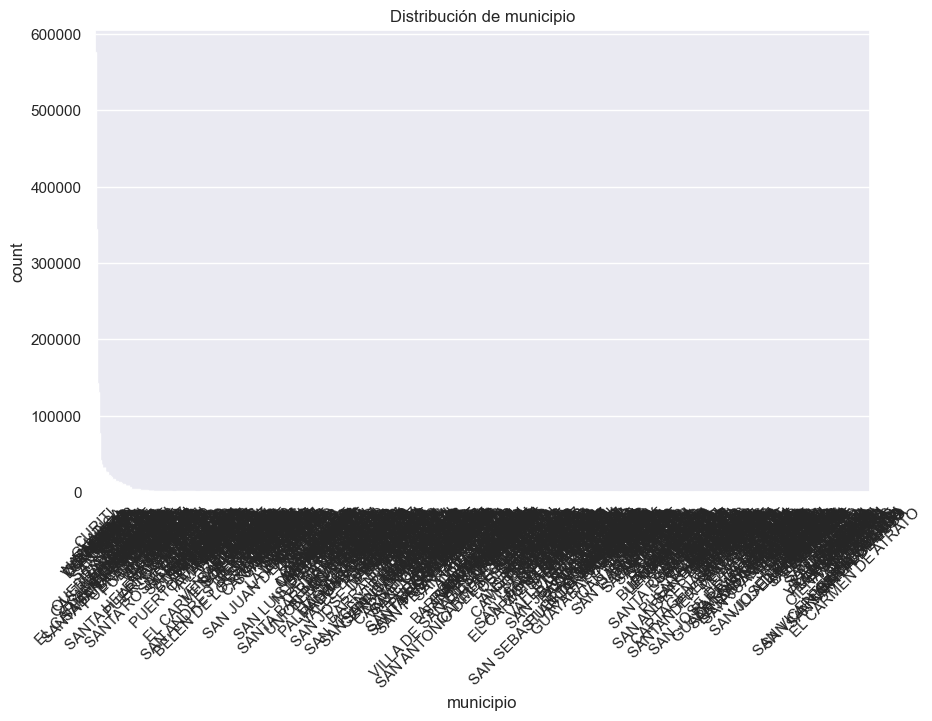

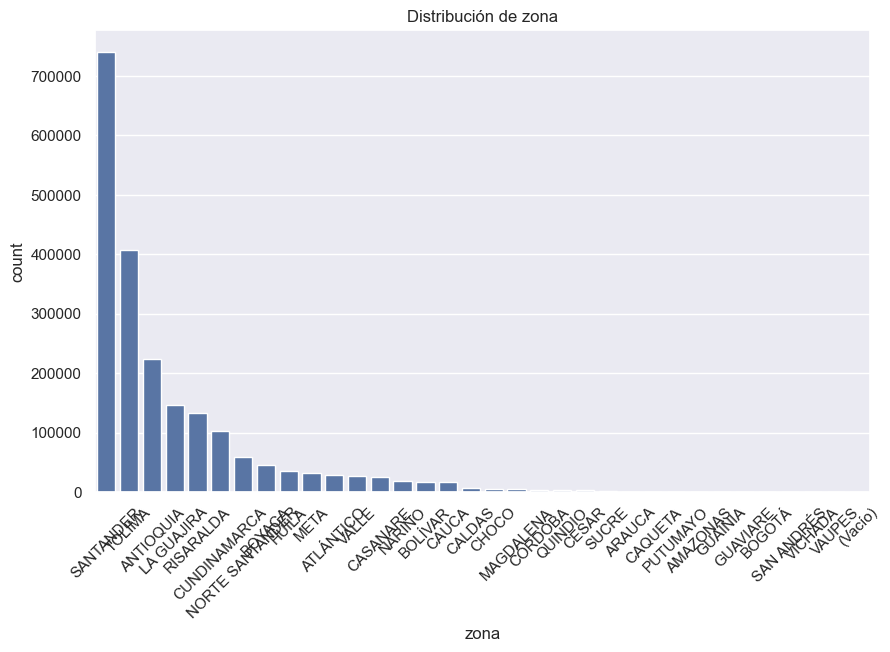

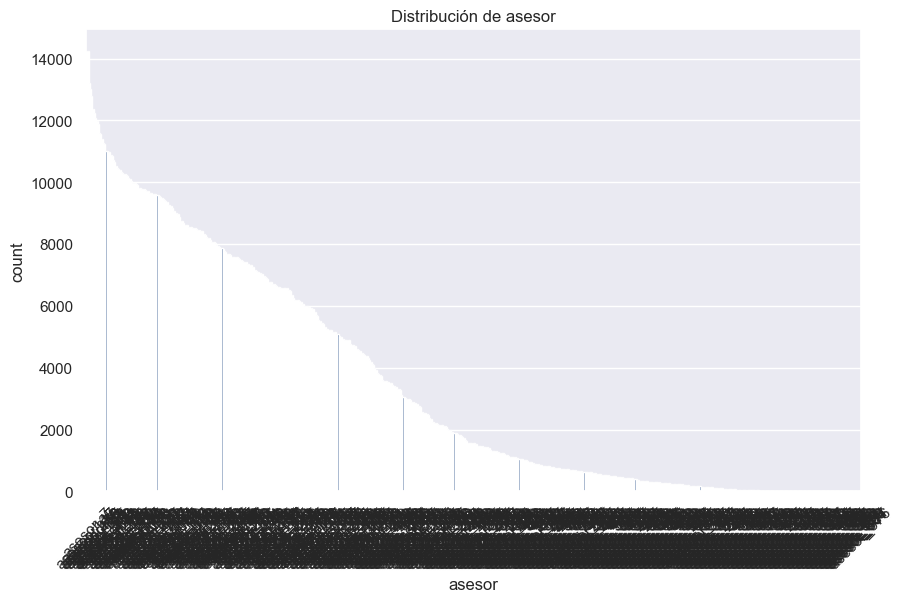

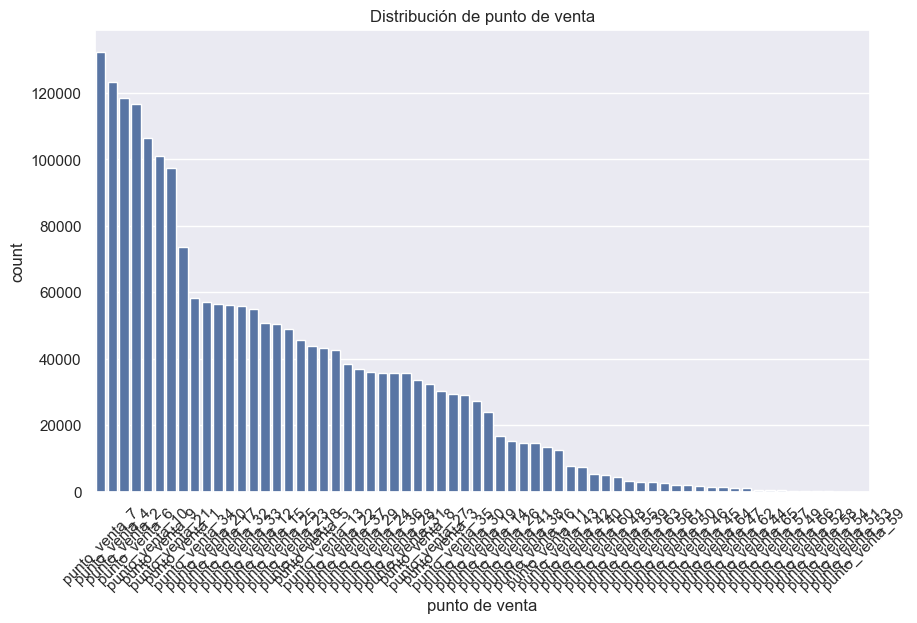

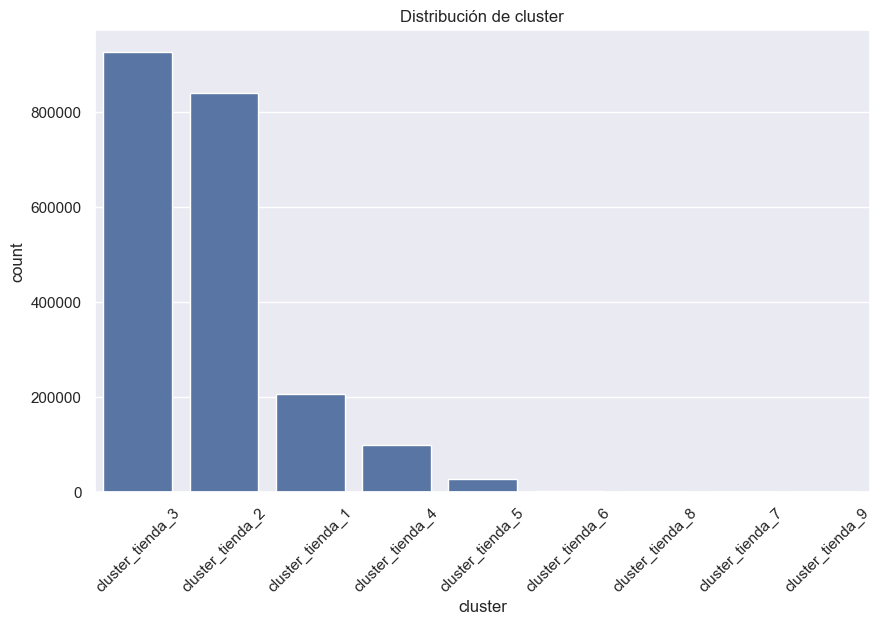

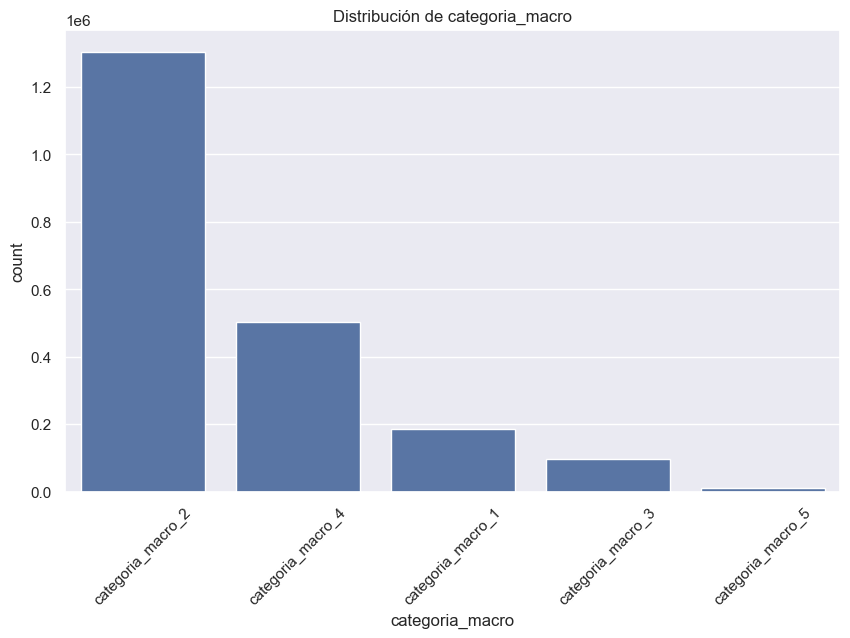

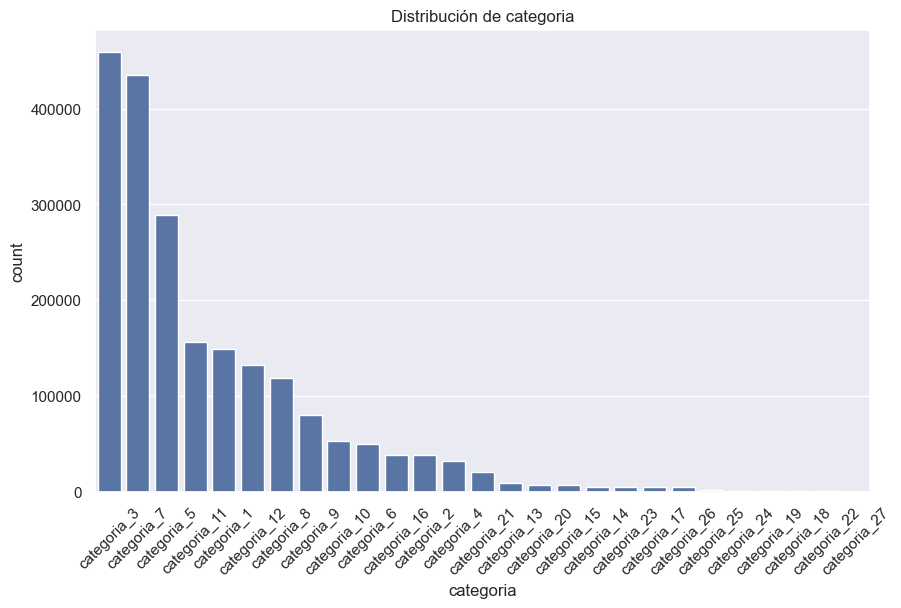

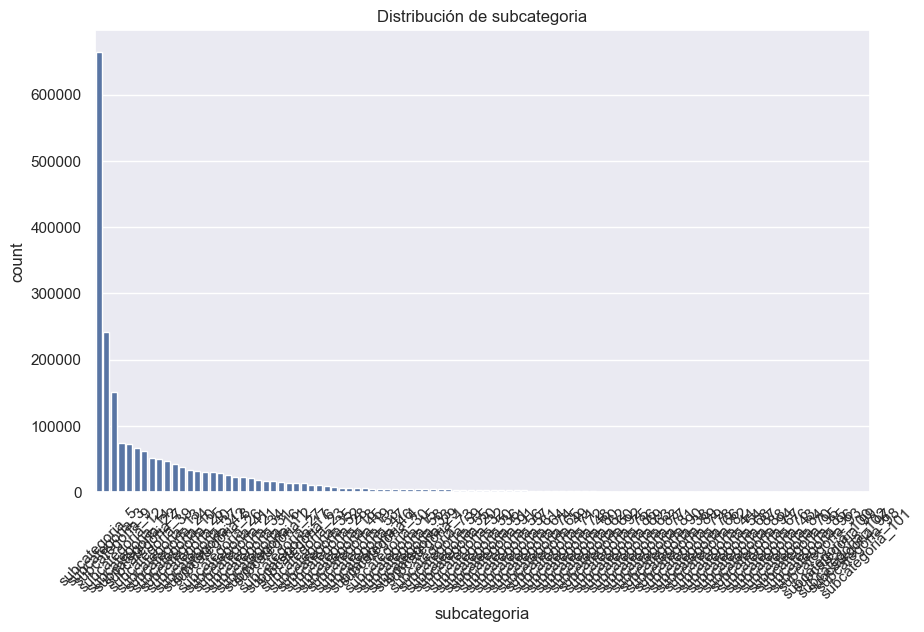

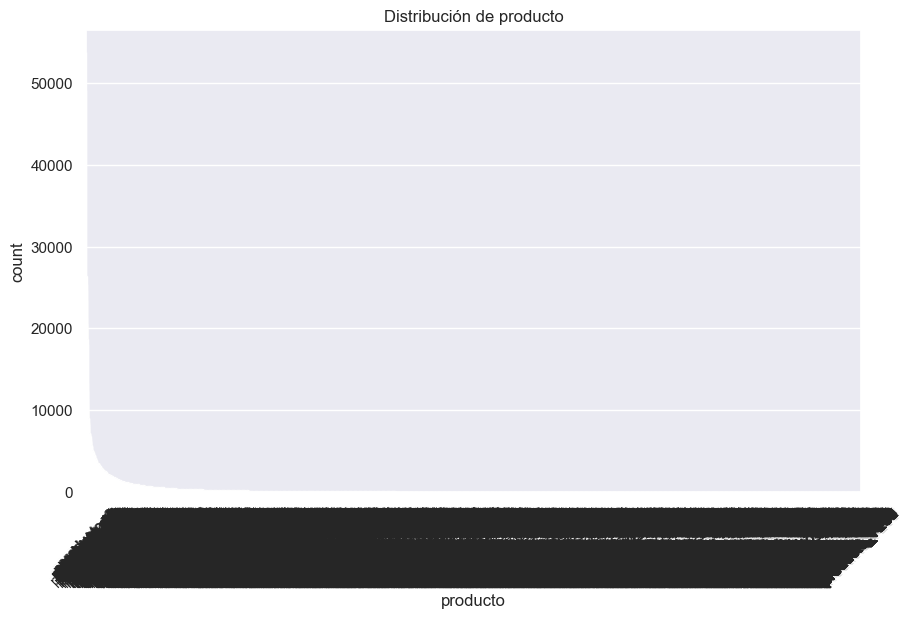

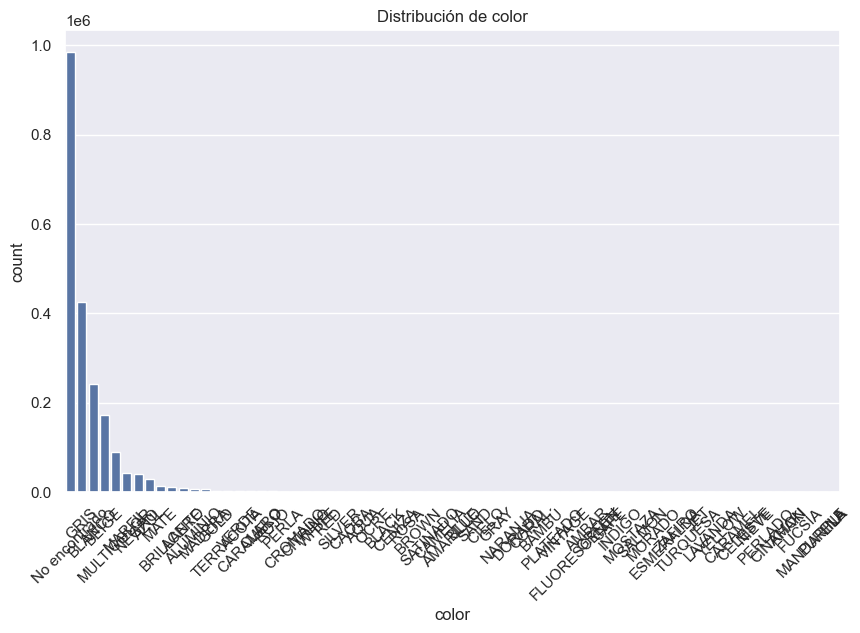

In [19]:
for col in var_cat:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_trans_B2C, x=col, order=df_trans_B2C[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

### 1.3 Análisis Calidad de Datos

In [ ]:
#COMLPETITUD

df_porcentajes = (100*df_trans_B2C.isna().sum()/len(df_trans_B2C)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
precio,0.025288
zona,0.000857
pedido,0.000000
fecha,0.000000
edad,0.000000
id,0.000000
asesor,0.000000
punto de venta,0.000000
cluster,0.000000
municipio,0.000000


In [22]:
#UNICIDAD

duplicados=df_trans_B2C[df_trans_B2C.duplicated()].value_counts()
print(duplicados)

Series([], Name: count, dtype: int64)


Se revisa la unicidad por fila completa ya que no puede haber dos transacciones iguales, sin embargo no se evidencian entras repetidas.

In [24]:
#CONSISTENCIA VARIABLES NUMÉRICAS
df_trans_B2C[var_num].value_counts()

pedido  id      edad  cantidad  precio  valor  alineación con portafolio estratégico
334331  141318  40    3.00      0.39    1.17   0.155520                                 11
654496  1731    39    8.00      0.39    3.12   0.418176                                  9
341668  201304  54    2.00      0.39    0.78   0.103680                                  9
96742   65715   47    14.00     0.37    5.18   0.635904                                  9
489178  262056  38    9.00      0.39    3.50   0.470016                                  9
                                                                                        ..
21      20      31    1.44      3.12    4.49   0.397440                                  1
22      21      45    1.00      0.34    0.34   0.044928                                  1
                                33.47   33.47  2.972160                                  1
23      22      37    3.00      1.75    5.24   0.546048                                  1
93393

In [25]:
#CONSISTENCIA VARIABLES CATEGÓRICAS
df_trans_B2C[var_cat].describe()

,fecha,municipio,zona,asesor,punto de venta,cluster,categoria_macro,categoria,subcategoria,producto,color
count,2099836,2099836,2099818,2099836,2099836,2099836,2099836,2099836,2099836,2099836,2099836
unique,756,808,34,608,66,9,5,27,102,7280,69
top,1971-06-28,CURITI,SANTANDER,asesor_137,punto_venta_7,cluster_tienda_3,categoria_macro_2,categoria_3,subcategoria_5,producto_49,No encontrado
freq,6572,576380,739964,14230,132386,926405,1304967,459528,663877,53825,984853


In [26]:
#VALIDEZ

date_var = pd.to_datetime(df_trans_B2C['fecha'], errors='coerce')
date_var.isnull().sum()


np.int64(0)

Ya que hay un conjunto de datos fecha se convierte al formato DateTime para darle un manejo adecuado y se revisa su completitud.

### 1.4 Revisión de Correlación

In [26]:
df_trans_B2C[["pedido", "id"]].corr()

,pedido,id
pedido,1.000000,0.562144
id,0.562144,1.000000


In [27]:
df_trans_B2C[["valor", "precio"]].corr()

,valor,precio
valor,1.00000,0.18364
precio,0.18364,1.00000


In [28]:
df_trans_B2C[["cantidad", "valor"]].corr()

,cantidad,valor
cantidad,1.000000,0.514885
valor,0.514885,1.000000


In [30]:
df_trans_B2C[["alineación con portafolio estratégico", "valor"]].corr()

,alineación con portafolio estratégico,valor
alineación con portafolio estratégico,1.000000,0.525386
valor,0.525386,1.000000


No hay correlaciones elevadas en el DF que pudieran representar errores en la manipulación de los datos

## 2. Prepración de datos

# Cotizaciones B2C

## 1. Entendimiento y Perfilamiento de datos

In [27]:
df_cot_B2C.shape

(180387, 11)

In [28]:
df_cot_B2C.sample(10)

,cotizacion,estado_cotizacion,id,fecha_creacion,fecha_modificacion,categoria_macro,categoria,producto,cantidad,precio,valor
143810,2293211.0,Cotización Ganada,126691,1972-11-28 15:53:35.460,1972-11-28 16:20:45,categoria_macro_1,categoria_1,producto_273,1.0,11.260286,11.260286
39951,1660573.0,Abierta,421452,1972-12-09 09:35:21.150,1972-12-14 08:51:10,categoria_macro_3,categoria_14,producto_2797,1.0,77.877428,77.877428
49613,4276801.0,Cotización Ganada,123287,1972-12-23 10:13:33.783,1972-12-23 10:27:05,categoria_macro_4,categoria_11,producto_277,1.0,1.677857,1.677857
112175,8000615.0,Cotización Ganada,79257,1972-07-27 13:40:36.293,1972-07-27 14:18:16,categoria_macro_1,categoria_1,producto_1373,1.0,12.221429,12.221429
5498,3244646.0,Cotización Ganada,88682,1972-08-13 17:15:24.577,1972-08-13 17:27:03,categoria_macro_4,categoria_11,producto_842,1.0,12.088857,12.088857
102391,7792862.0,Cotización Ganada,248814,1972-07-19 10:14:28.723,1972-07-19 10:33:21,categoria_macro_3,categoria_13,producto_944,1.0,6.951714,6.951714
14804,5383269.0,Cotización Expirada,15338,1972-08-14 09:09:06.307,1972-08-21 15:07:38,categoria_macro_4,categoria_11,producto_102,4.0,4.420428,17.681713
66580,1625710.0,Cotización Ganada,189552,1973-01-14 13:45:18.057,1973-01-14 13:54:23,categoria_macro_4,categoria_9,producto_5418,1.0,7.283143,7.283143
127984,7794269.0,Cotización Ganada,131636,1972-12-11 08:30:48.343,1972-11-12 09:30:09,categoria_macro_4,categoria_10,producto_548,1.0,53.343428,53.343428
122911,6874945.0,Cotización Ganada,365593,1972-11-08 12:38:32.110,1972-11-08 12:43:11,categoria_macro_4,categoria_10,producto_3356,2.0,38.106000,76.212000


In [29]:
df_cot_B2C.head()

,cotizacion,estado_cotizacion,id,fecha_creacion,fecha_modificacion,categoria_macro,categoria,producto,cantidad,precio,valor
0,1381861.0,Cotización Ganada,91587,1972-08-05 12:25:47.700,1972-08-05 13:37:35,categoria_macro_4,categoria_9,producto_524,1.0,34.957429,34.957429
1,1381861.0,Cotización Ganada,91587,1972-08-05 12:25:47.700,1972-08-05 13:37:35,categoria_macro_4,categoria_11,producto_124,1.0,2.262000,2.262000
2,1381861.0,Cotización Ganada,91587,1972-08-05 12:25:47.700,1972-08-05 13:37:35,categoria_macro_4,categoria_10,producto_5085,1.0,40.600000,40.600000
3,1381861.0,Cotización Ganada,91587,1972-08-05 12:25:47.700,1972-08-05 13:37:35,categoria_macro_4,categoria_11,producto_188,1.0,7.863143,7.863143
4,1381864.0,Cotización Ganada,93623,1972-08-05 14:36:57.273,1972-08-05 15:06:26,categoria_macro_4,categoria_10,producto_391,1.0,63.932571,63.932571


In [30]:
df_cot_B2C.describe()

,cotizacion,id,cantidad,precio,valor
count,1.803870e+05,180387.000000,180387.000000,180387.000000,180387.000000
mean,5.078489e+06,201958.376563,30.337815,18.897239,36.905377
std,2.330758e+06,131817.410108,1128.197335,43.212077,884.640566
min,1.330102e+06,9.000000,0.000000,0.000000,0.000000
25%,3.014320e+06,90794.500000,1.000000,1.702715,2.850289
50%,4.625202e+06,156082.000000,1.000000,6.844000,9.495428
75%,7.073812e+06,357146.000000,2.000000,19.214571,27.657714
max,9.660005e+06,429016.000000,438000.000000,3087.911715,366411.673079


In [31]:
df_cot_B2C.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180387 entries, 0 to 180386
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   cotizacion          180387 non-null  float64
 1   estado_cotizacion   180387 non-null  object 
 2   id                  180387 non-null  int64  
 3   fecha_creacion      180387 non-null  object 
 4   fecha_modificacion  180387 non-null  object 
 5   categoria_macro     180387 non-null  object 
 6   categoria           180387 non-null  object 
 7   producto            180387 non-null  object 
 8   cantidad            180387 non-null  float64
 9   precio              180387 non-null  float64
 10  valor               180387 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 15.1+ MB


In [32]:
# Para categorizar las variables en su tipo de dato
categorical_cols = df_cot_B2C.select_dtypes(include=["object"]).columns
numeric_cols = df_cot_B2C.select_dtypes(include=["number"]).columns
datetime_cols = df_cot_B2C.select_dtypes(include=["datetime"]).columns

# Imprimir las variables categóricas
print("Variables categóricas:")
print(", ".join(categorical_cols))

# Imprimir las variables numéricas
print("\nVariables numéricas:")
print(", ".join(numeric_cols))

# Imprimir las variables de fecha
print("\nVariables de fecha:")
print(", ".join(datetime_cols))

Variables categóricas:
estado_cotizacion, fecha_creacion, fecha_modificacion, categoria_macro, categoria, producto

Variables numéricas:
cotizacion, id, cantidad, precio, valor

Variables de fecha:



### 1.1 Atributos Numéricos

In [5]:
numeric_cols = df_cot_B2C.select_dtypes(include=["number"]).columns
numeric_cols

Index(['cotizacion', 'id', 'cantidad', 'precio', 'valor'], dtype='object')

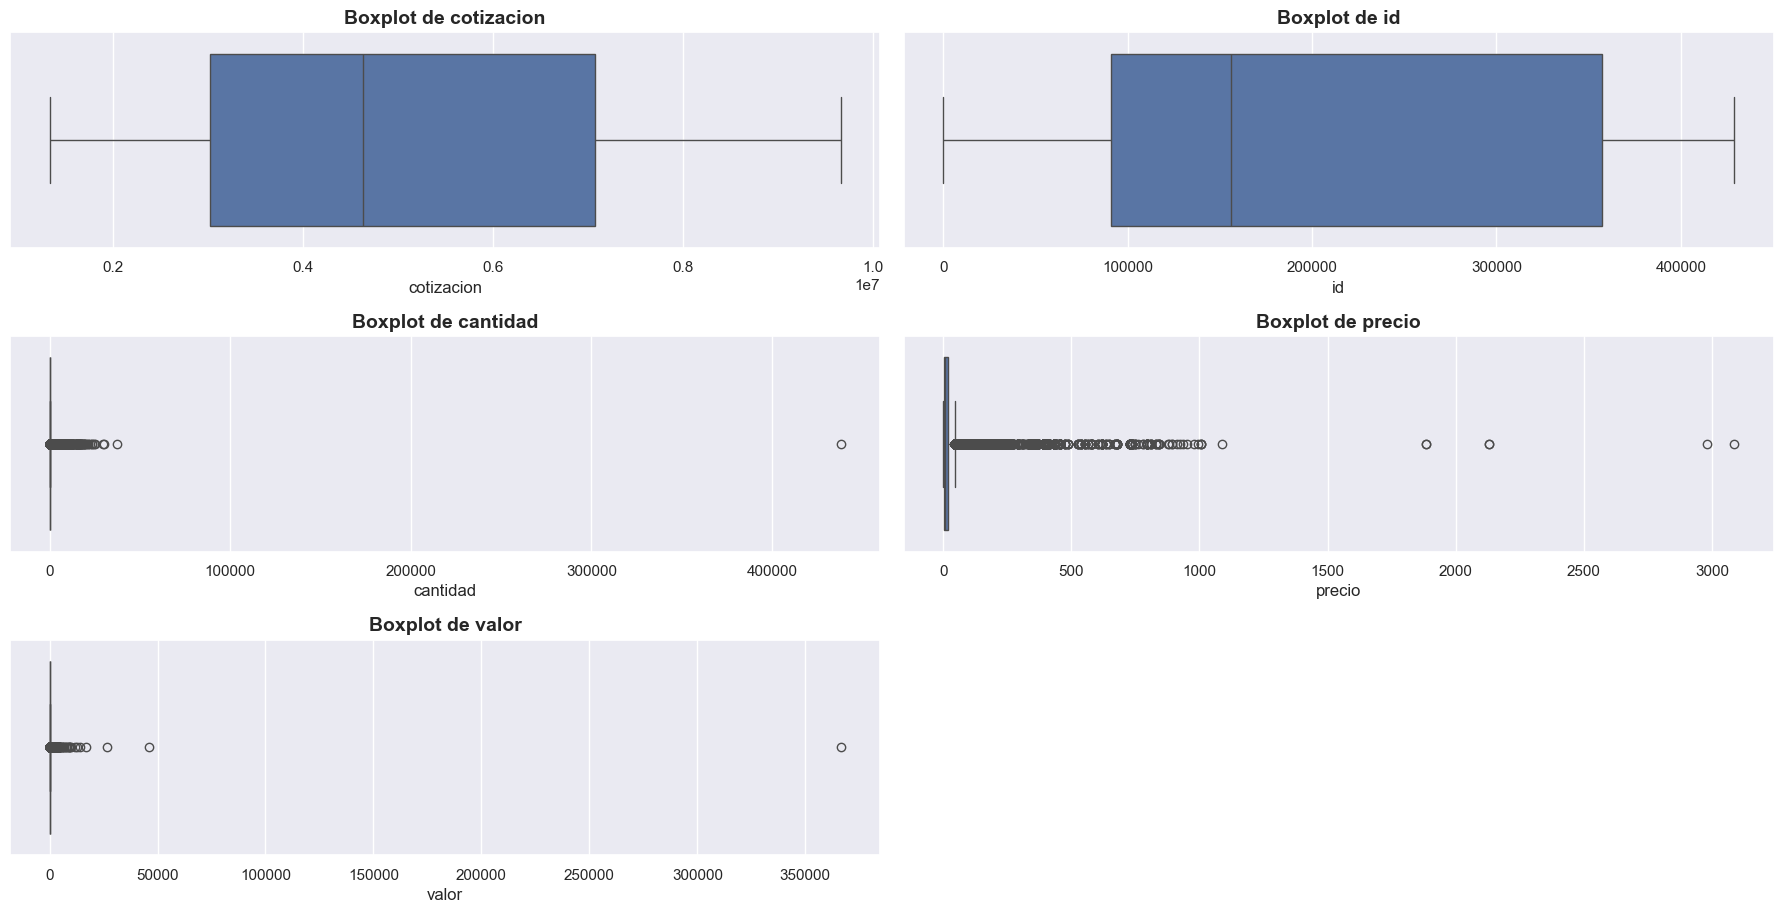

In [34]:
# BoxPlot de las variables numéricas
plt.figure(figsize=(18, 24))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(8, 2, i)
    sns.boxplot(x=df_cot_B2C[col])
    plt.title(f'Boxplot de {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

<Axes: xlabel='cotizacion', ylabel='Count'>

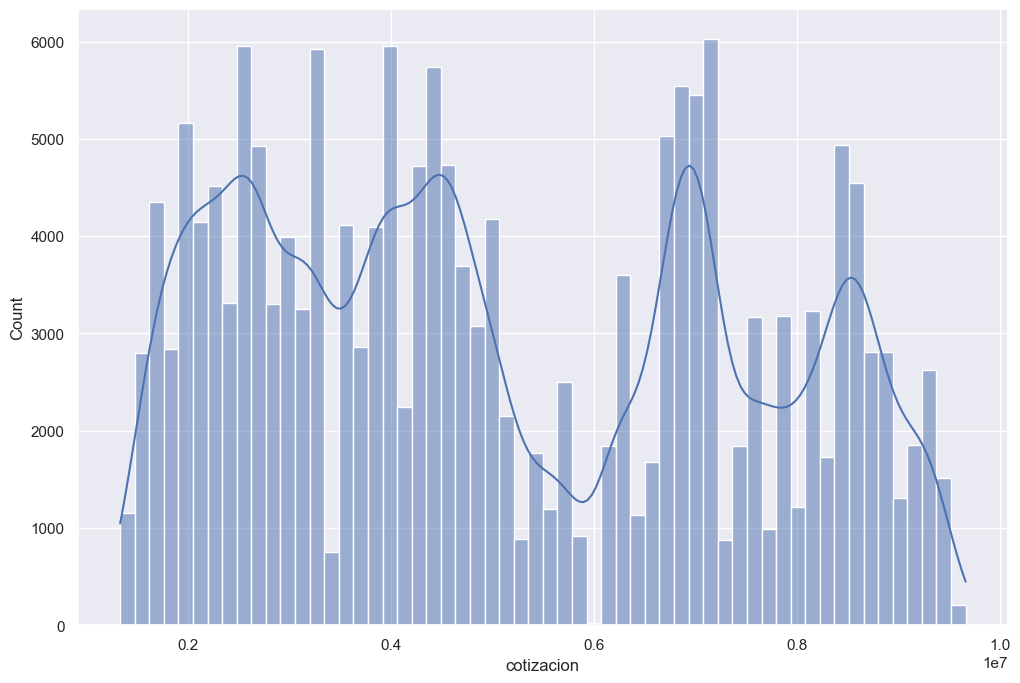

In [35]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_cot_B2C, x="cotizacion", kde=True)

<Axes: xlabel='id', ylabel='Count'>

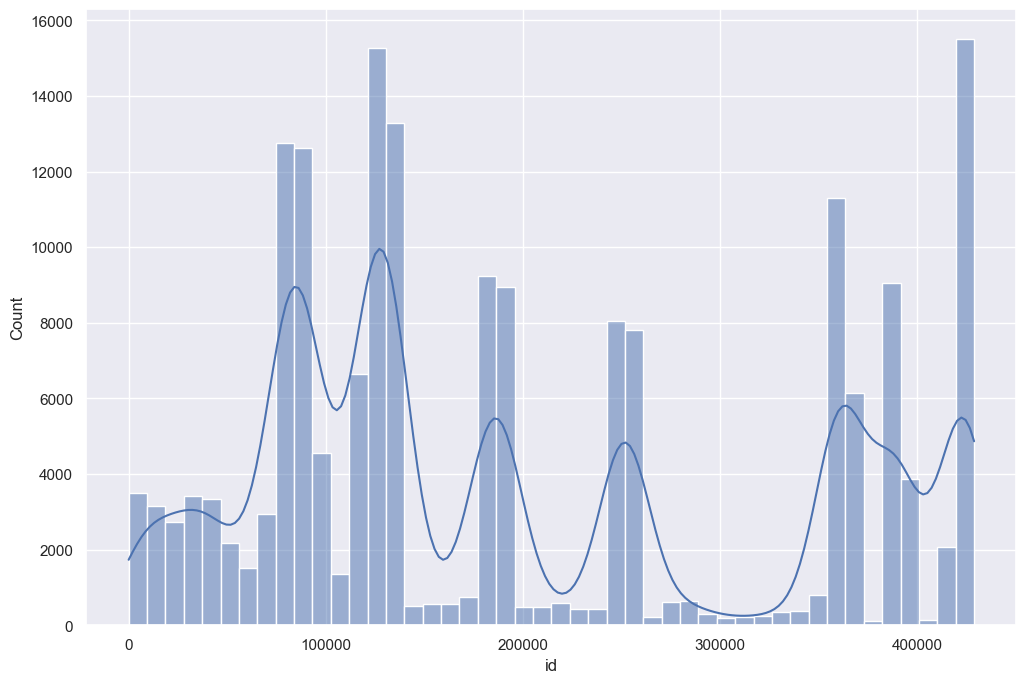

In [37]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_cot_B2C, x="id", kde=True)

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_cot_B2C, x="cantidad", kde=True)

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_cot_B2C, x="precio", kde=True)

In [ ]:
# Histogramas numericos
fig=plt.figure(figsize=(12,8))
sns.histplot(data=df_cot_B2C, x="valor", kde=True)

Text(0.5, 1.0, 'Correlación entre variables numéricas')

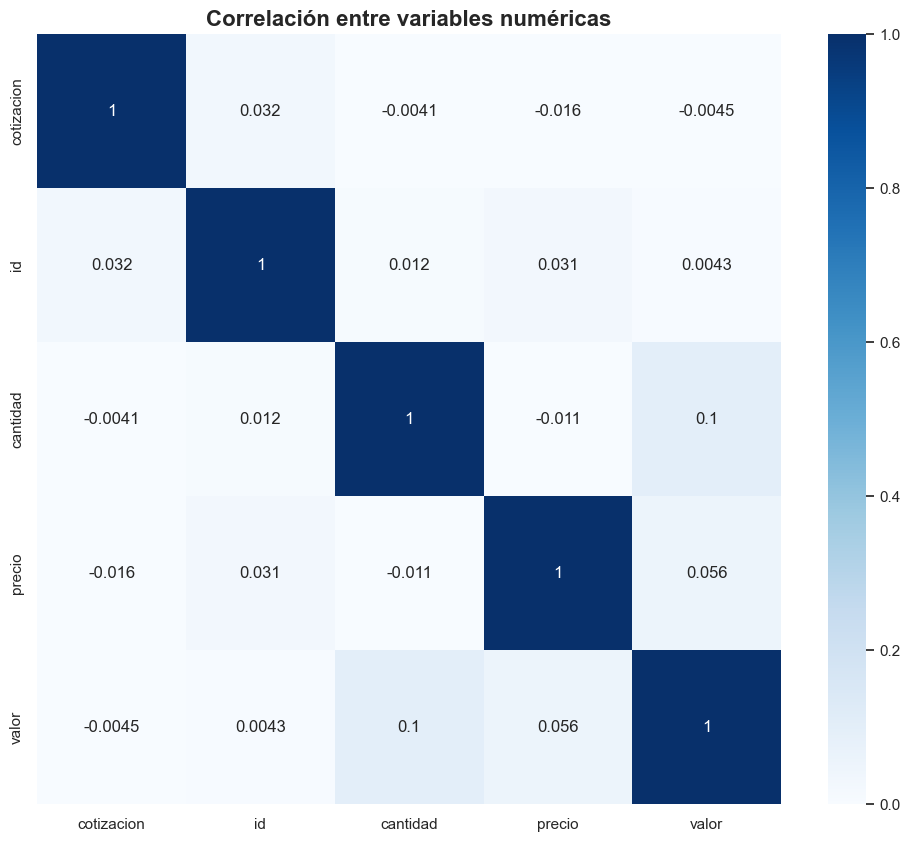

In [6]:
#Análisis de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(df_cot_B2C[numeric_cols].corr(), cmap="Blues", vmin=0, vmax=1, annot=True)
plt.title("Correlación entre variables numéricas", fontsize=16, fontweight='bold')

### 1.2 Atributos Categóricos

In [10]:
categorical_cols = ['estado_cotizacion',
       'categoria_macro', 'categoria', 'producto']

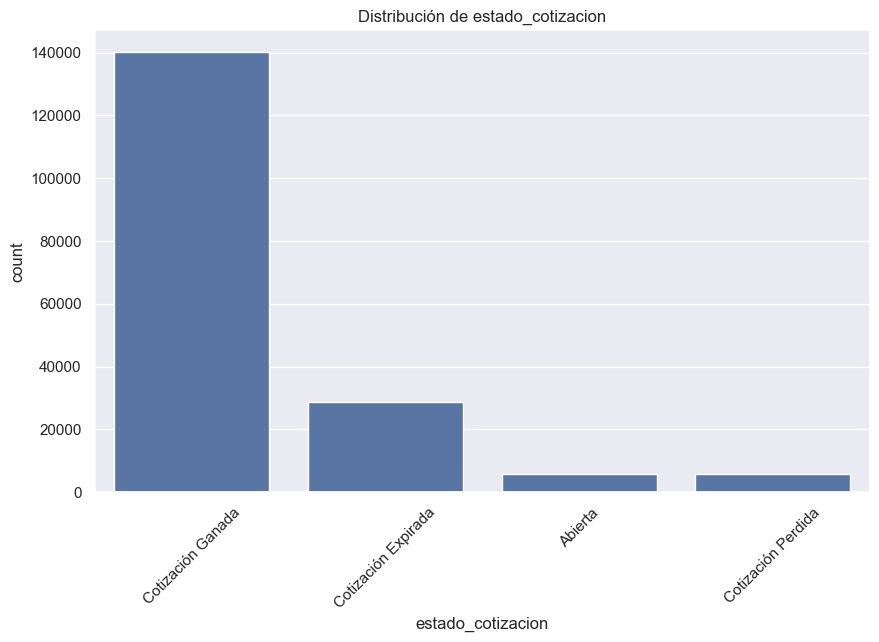

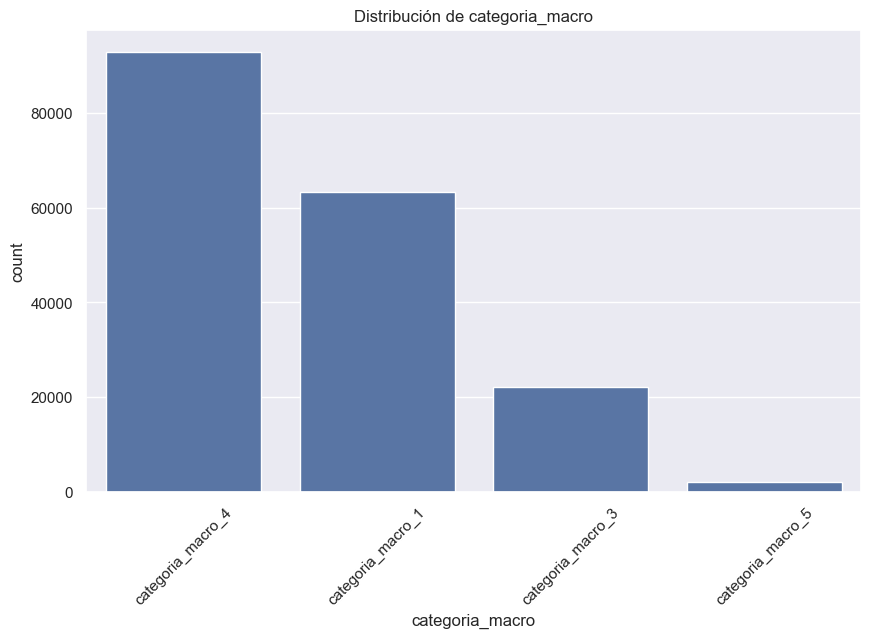

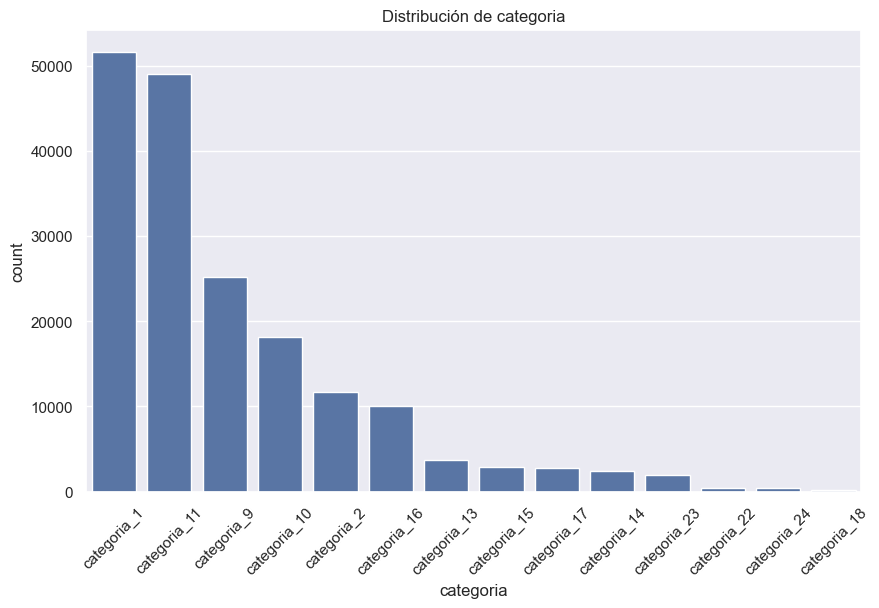

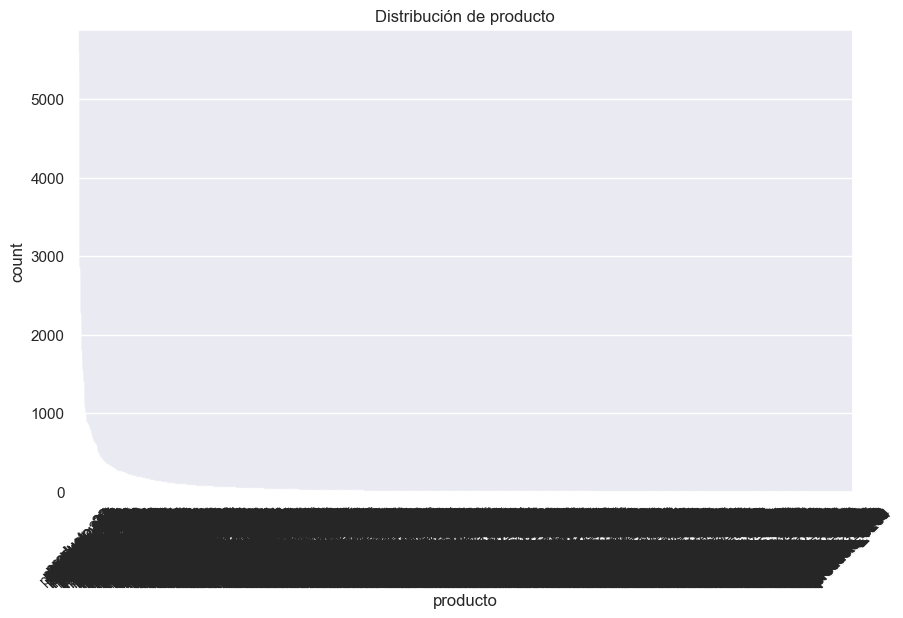

In [11]:
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_cot_B2C, x=col, order=df_cot_B2C[col].value_counts().index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.show()

### 1.3 Análisis Calidad de Datos

In [12]:
# COMPLETITUD
df_porcentajes = (100*df_cot_B2C.isna().sum()/len(df_cot_B2C)).to_frame()
df_porcentajes.sort_values(0, ascending = False)

,0
cotizacion,0.0
estado_cotizacion,0.0
id,0.0
fecha_creacion,0.0
fecha_modificacion,0.0
categoria_macro,0.0
categoria,0.0
producto,0.0
cantidad,0.0
precio,0.0


Los datos en la base de cotizaciones B2C están Completos

In [19]:
# UNICIDAD


duplicados=df_cot_B2C[df_cot_B2C.duplicated()].value_counts()
print(duplicados)

cotizacion  estado_cotizacion    id      fecha_creacion           fecha_modificacion   categoria_macro    categoria     producto       cantidad  precio      valor     
7591150.0   Cotización Ganada    356265  1972-11-02 09:30:46.730  1972-11-26 11:38:16  categoria_macro_1  categoria_1   producto_1719  2.0       7.349429    14.698858     4
3923662.0   Cotización Expirada  419331  1972-07-31 17:25:39.393  1972-08-05 09:10:21  categoria_macro_4  categoria_11  producto_648   1.0       3.239714    3.239714      3
2164642.0   Cotización Expirada  120287  1972-10-07 08:11:15.500  1972-10-08 08:43:59  categoria_macro_4  categoria_11  producto_981   1.0       12.337429   12.337429     3
4605987.0   Abierta              70369   1972-12-02 09:39:09.573  1972-12-04 10:48:55  categoria_macro_4  categoria_11  producto_27    1.0       0.364572    0.364572      3
2203770.0   Cotización Ganada    224816  1972-07-28 15:27:25.143  1972-07-29 10:15:46  categoria_macro_4  categoria_10  producto_1603  1.0  

Hay evidencia de un problema de duplicados en esta base de datos

In [20]:
#CONSISTENCIA VARIABLES NUMÉRICAS
df_cot_B2C[numeric_cols].describe()

,cotizacion,id,cantidad,precio,valor
count,1.803870e+05,180387.000000,180387.000000,180387.000000,180387.000000
mean,5.078489e+06,201958.376563,30.337815,18.897239,36.905377
std,2.330758e+06,131817.410108,1128.197335,43.212077,884.640566
min,1.330102e+06,9.000000,0.000000,0.000000,0.000000
25%,3.014320e+06,90794.500000,1.000000,1.702715,2.850289
50%,4.625202e+06,156082.000000,1.000000,6.844000,9.495428
75%,7.073812e+06,357146.000000,2.000000,19.214571,27.657714
max,9.660005e+06,429016.000000,438000.000000,3087.911715,366411.673079


In [21]:
#CONSISTENCIA VARIABLES CATEGÓRICAS
df_cot_B2C[categorical_cols].value_counts()

estado_cotizacion   categoria_macro    categoria     producto     
Cotización Ganada   categoria_macro_4  categoria_11  producto_28      4903
                                                     producto_277     4477
                    categoria_macro_1  categoria_1   producto_4637    2593
                    categoria_macro_4  categoria_11  producto_27      2414
                                                     producto_188     2247
                                                                      ... 
Abierta             categoria_macro_1  categoria_1   producto_1583       1
Cotización Perdida  categoria_macro_4  categoria_9   producto_896        1
                                                     producto_914        1
                    categoria_macro_5  categoria_23  producto_1784       1
                                                     producto_2358       1
Name: count, Length: 6535, dtype: int64

In [22]:
#VALIDEZ
date_var1 = pd.to_datetime(df_cot_B2C['fecha_creacion'], errors='coerce')
date_var1.isnull().sum()

date_var2 = pd.to_datetime(df_cot_B2C['fecha_modificacion'], errors='coerce')
date_var2.isnull().sum()

np.int64(0)

### 1.4 Revisión de Correlación

In [ ]:
df_cot_B2C[["valor", "cotizacion"]].corr()

,valor,cotizacion
valor,1.000000,-0.004515
cotizacion,-0.004515,1.000000


In [24]:
df_cot_B2C[["id", "cotizacion"]].corr()

,id,cotizacion
id,1.00000,0.03205
cotizacion,0.03205,1.00000


In [25]:
df_cot_B2C[["valor", "precio"]].corr()

,valor,precio
valor,1.000000,0.055652
precio,0.055652,1.000000


## 2. Preparación de datos